This tutorial will demonstrate how to obtain difference images for a planet candidate in TESS data.

In [1]:
import matplotlib.pyplot as plt
import sys

sys.path.append('../code')

Provide some basic information on the star and its planet. In this example, we'll look at TIC-25375553, the host star of confirmed planet TOI-143.01 (WASP-111b). There's only one planet in this example, but for multi-planet systems you should list all planets in the same format.

In [2]:
star = {}
star['id'] = 25375553
star['raDegrees'] = 328.76768
star['decDegrees'] = -22.61258

planet0 = {}
planet0['period'] = 2.3112
planet0['epoch'] = 1327.8925
planet0['durationHours'] = 3.5319

Since TESS works in distinct "sectors" of data (~27 days), decide which sector you would like to use for difference images. TIC-25375553 was observed in both Sectors 1 and 28, but if you aren't sure, you can check with tess-point. For example:

In [3]:
from tess_stars2px import tess_stars2px_function_entry

outID, outEclipLong, outEclipLat, outSec, outCam, outCcd,\
    outColPix, outRowPix, scinfo = tess_stars2px_function_entry(star['id'], star['raDegrees'], star['decDegrees'])

print(outSec, outCam)

[ 1 28] [1 1]


Let's pick the most recently observed sector, Sector 28. This will take about a minute to run, as it downloads the FFI cutout using TESScut, identifies the in-transit datapoints, and calculates the difference image. 

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
curl "https://mast.stsci.edu/tesscut/api/v0.1/astrocut?ra=328.76768&dec=-22.61258&y=20&x=20&sector=28" --output tic25375553.zip
['tic25375553/tess-s0028-1-3_328.767680_-22.612580_20x20_astrocut.fits']
no sector quality flags of the same length as FFI quality flags


/home/mkuni/.local/lib/python3.6/site-packages/astropy/_erfa/core.py:4212: RuntimeWarning: invalid value encountered in ld
  p1 = ufunc.ld(bm, p, q, e, em, dlim)
/home/mkuni/.local/lib/python3.6/site-packages/astropy/_erfa/core.py:17885: RuntimeWarning: invalid value encountered in anp
  c_retval = ufunc.anp(a)


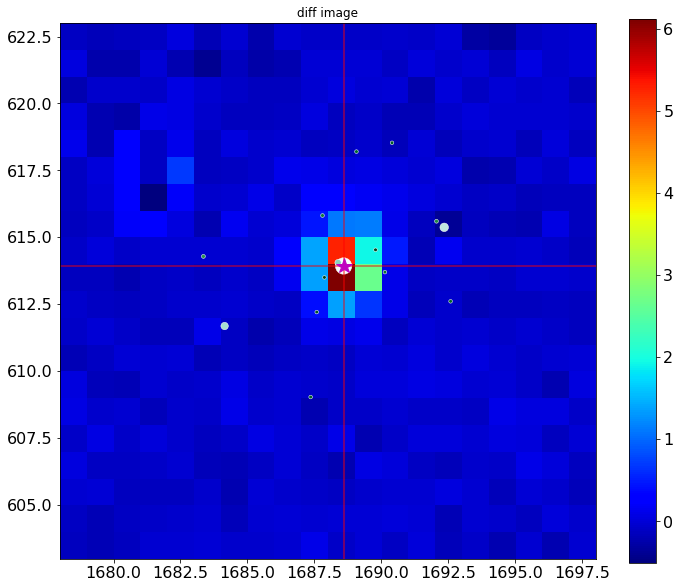

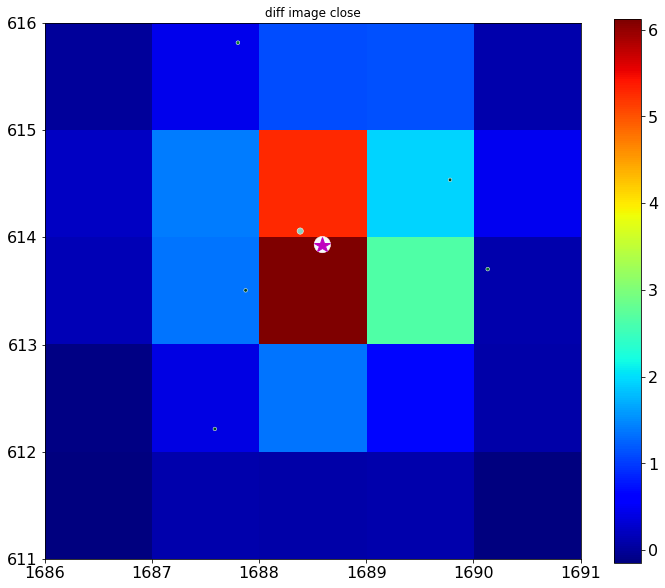

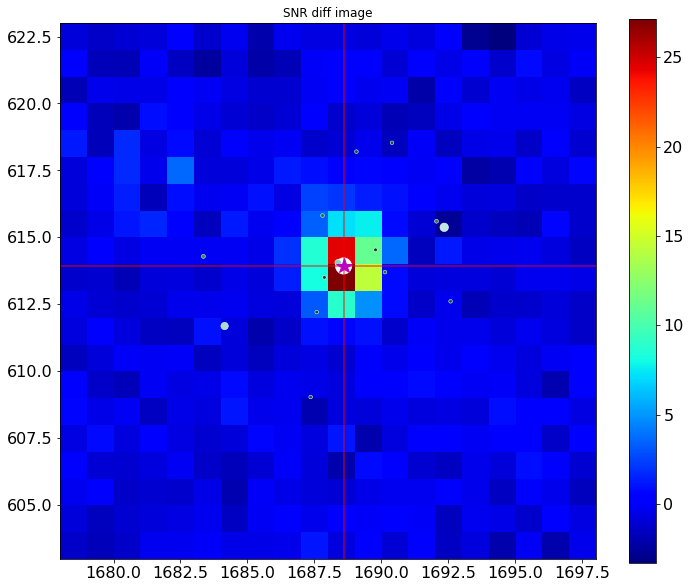

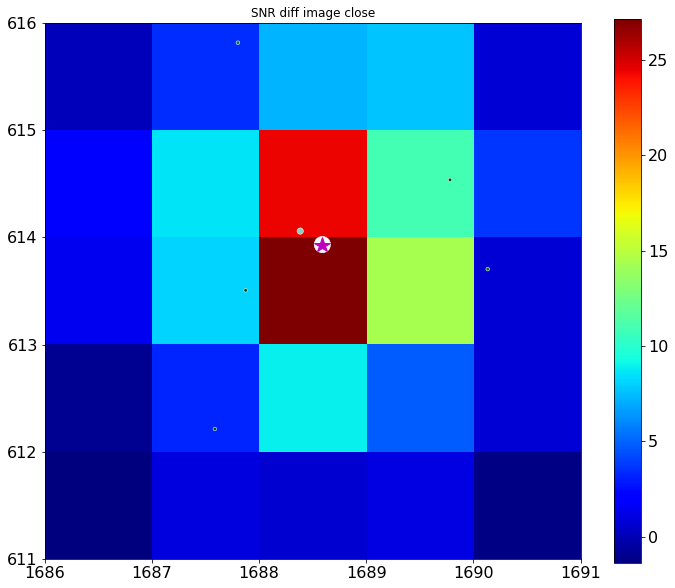

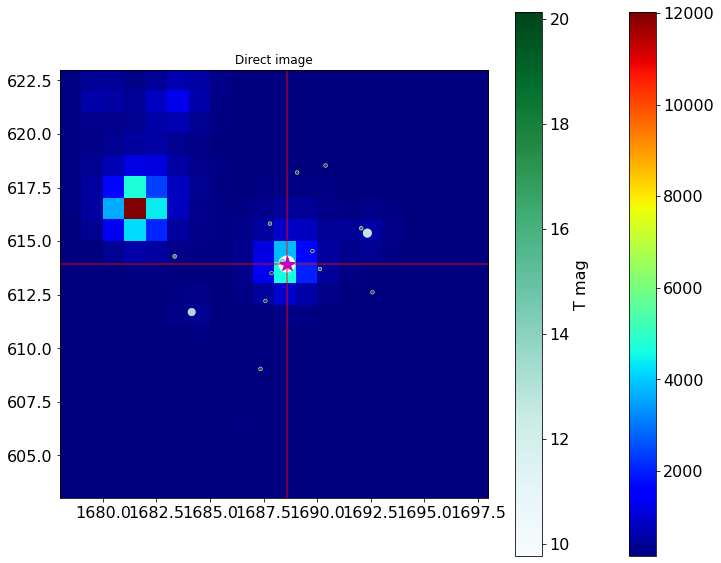

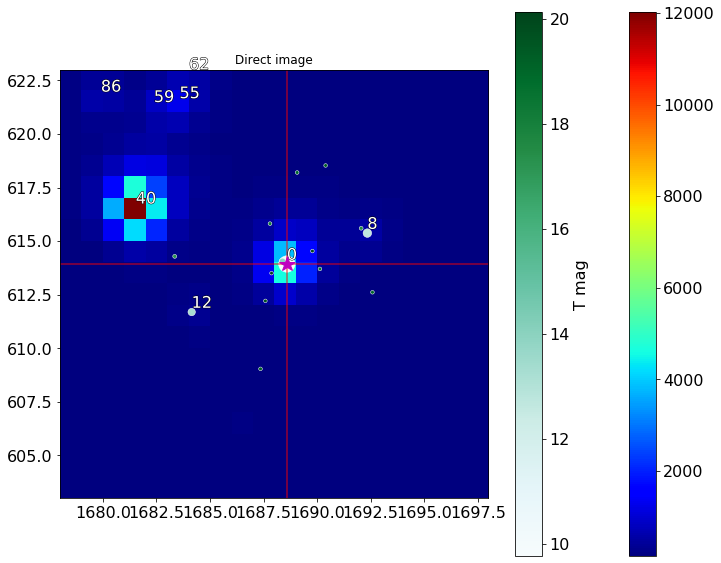

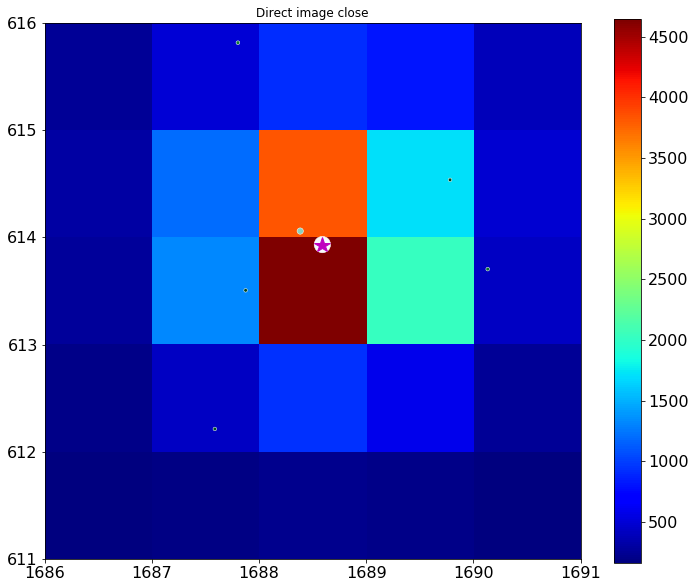

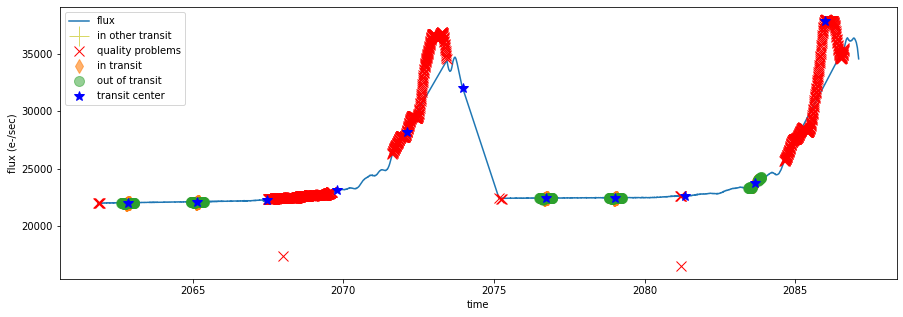

In [4]:
import tessDiffImage as td

star['sector'] = 28
star['cam'] = 1
star['planetData'] = [planet0]
# If you have quality flags for each cadence in the sector in a file, name the file here; otherwise None
star['qualityFiles'] = None
# If you have quality flags for each cadence in the sector in an array, put the array here; otherwise None
star['qualityFlags'] = None

td.make_ffi_difference_image(star, thisPlanet=0)

The image data was saved in the newly created tic25375553 folder. You'll also find difference image plots saved as pdfs using default the default plotting, and a list of all nearby TICs. You can always load the data back in if you want to manipulate the data on your own:

In [5]:
import pickle

fname = 'tic25375553/imageData_planet0_sector28_camera1.pickle'
with open(fname, 'rb') as f:
    imageData = pickle.load(f)